In [3]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

from IPython.display import display, Markdown

### Estimation of difference

If we have two populations, say normally distributed. 

The question is, are these populations different?

What does it mean different? Their distributions are different.

Example, legth of two subpopulations of the bird genus Accipiter.

https://www.audubon.org/news/a-beginners-guide-iding-coopers-and-sharp-shinned-hawks


We have two populations, let's say both normally distributed.

Are the means of these two populations different?

Let's sample each one:

Sample from population one: $\bar{x}_1$, $n_1$, $\sigma_1$ or $s_1$.

Sample from population two: $\bar{x}_2$, $n_2$, $\sigma_2$ or $s_2$.

We can form a new variable: 

$\bar{x}_1-\bar{x}_2$

Now for this variable:

1. $\bar{x}_1-\bar{x}_2$ is normally distributed
2. The mean is $\mu_{\bar{x}_1-\bar{x}_2}=\mu_1-\mu_2$
2. The standard deviation is $\sigma_{\bar{x}_1-\bar{x}_2}=\sqrt{\frac{\sigma^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}$

If $n_1>30$ and $n_2>30$, this applies to any distribution.

The confidence interval is:

$(\bar{x}_1-\bar{x}_2)-E<\mu_1-\mu_2<(\bar{x}_1-\bar{x}_2)+E$

where:

$E=z_c\sqrt{\frac{\sigma^2_1}{n_1}+\frac{\sigma^2_2}{n_2}}$

In the case when we don't know $\sigma_1$ or/and $\sigma_2$:

$E=t_c\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}$

with dof the smaller of the two $n_1-1$ or $n2_1$.

This is not exactly correct, only approximate. 

## Boxplot

Very convenient way to represent the data in a plot.

Especially if the data has $\bf{outliers}$.

Outliers do not seem to belong to a distribution.


     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR
                       
The $\bf{median}$ is the point below which 50% of the point are.

The $\bf{box}$ extends:

The $\bf{first\ quartile,\ Q1}$ is the point below 25% of the data is.

The $\bf{third\ quartile,\ Q3}$ is the point below 75% of the data is.

IQR is the $\bf{Interquartile\ Range}$.

The $\bf{whiskers}$ extend to 1.5 of IQR. 

Why 1.5? From the normal distribution confidence intervals.

Any point beyond the whiskers is considered an $\bf{outlier}$ or $\bf{flier}$.


(array([3., 7., 5., 2., 1., 1., 0., 0., 0., 1.]),
 array([ 2. ,  8.9, 15.8, 22.7, 29.6, 36.5, 43.4, 50.3, 57.2, 64.1, 71. ]),
 <BarContainer object of 10 artists>)

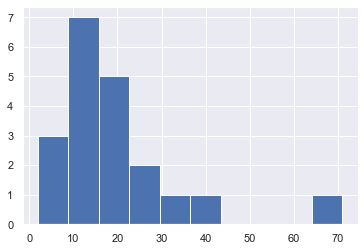

In [24]:
#Example

data=[12,15,21,2,6,3,15,71,22,18,37,12,25,19,33,15,14,17,12,27]
plt.hist(data)

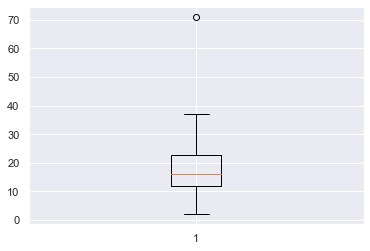

In [25]:
#Boxplot

fig=plt.boxplot(data)
plt.show()

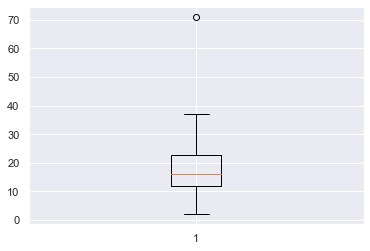

In [26]:
#We can also bootstrap the data for the confidence intervals
fig=plt.boxplot(data,bootstrap=1000)
plt.show()

## What is bootstrapping?

Resample the sample. Or fake sampling. 

Good if we have outliers. In that case t-distribution cannot be used.

The ouliers in a way make the distribution extremely skewed.

1. Resample the sample with replacements.
2. Calculate the resample means $\bar{x}$.
3. Find the confidence intervals from the resampled distribution.

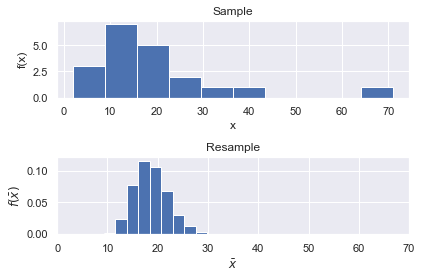

In [44]:
#Let's resample our data many times
data=[12,15,21,2,6,3,15,71,22,18,37,12,25,19,33,15,14,17,12,27]

n_resamples=1000
x_bar=np.zeros(n_resamples)
for i in range(n_resamples):
    sample=np.random.choice(data,len(data))
    x_bar[i]=np.mean(sample)

    
fig, ax=plt.subplots(2)
ticks=np.arange(0.0,80.0,10.0)
ax[0].hist(data)
ax[0].set_title('Sample')
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].set_xticks(ticks)

#Now plot the histogram of x_bar

ax[1].hist(x_bar, align="left",density=True,alpha=1.0)
ax[1].set_title('Resample')
ax[1].set_xlabel(r'$\bar{x}$')
ax[1].set_ylabel(r'$f(\bar{x})$')
ax[1].set_xticks(ticks)

fig.tight_layout(pad=1)

plt.show()    

In [49]:
#Let's find the confidence interval for C=0.9
#Order the resampled data, x_bar, and find the positions of (1-C)/2

sorted_x_bar=np.sort(x_bar)
#We have 1000 numbers in x_bar
#Get the element 1000-900/2=50 
#and 1000-50=950

x_lower=sorted_x_bar[50]
x_upper=sorted_x_bar[950]
print("The confidence interval for confidence of 90% is",(x_lower,x_upper))

The confidence interval for confidence of 90% is (15.0, 25.45)
